<a href="https://colab.research.google.com/github/VicDc/Uruz01/blob/main/7002_011-Niov_25_TimeSeriesII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OPIT

Instructor: Sabyasachi Dasgupta

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
class1_scores = [80, 80, 87, 65, 67, 79, 74, 88, 75, 70]
class2_scores = [80, 80, 87, 65, 67, 79, 74, 88, 75, 70]

In [ ]:
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

In [ ]:
# Output the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 0.0
P-value: 1.0


In [ ]:
# Check if the result is statistically significant (using a common significance level of 0.05)
if p_value < 0.05:
    print("There is a significant difference between the exam scores of the two classes.")
else:
    print("There is no significant difference between the exam scores of the two classes.")


There is no significant difference between the exam scores of the two classes.


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv")

In [ ]:
data

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [ ]:
from statsmodels.tsa.stattools import adfuller



In [ ]:
result = adfuller(data['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
#If the p-value is greater than 0.05, the series is not stationary.

ADF Statistic: -2.212478952793599
p-value: 0.20174753235777343


**What will we learn today?**

* Facebook Prophet

* Time Series as a Supervised Learning problem

* Deep Learning for Stock Prediction

* Time Series Final Project Brainstorm - exercise

## Facebook Prophet

* FB Prophet is a procedure for forecasting time series data using a powerful toolkit created by Facebook. It allows us to decompose and model trends from time series data.

* It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


### Why use Facebook Prophet?

* It is accurate and fast
    * It is used in many applications across Facebook and it produces reliable forecasts for planning and goal setting.
    * Forescasts in a few seconds.
* Fully automatic
    * No manual effort. Robust to outliers, missing data, changes in time series.
* Tunable forecasts
    * Users can tweak and adjust forecasts. Add your domain knowledge!
* R or Python
*Allows us to solve various Business Analytics Questions

### Predicting and Decomposing Online Sales for a Company using FB Prophet!

In [ ]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import requests, json, os, warnings, re

# ignore warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
# !pip list

In [ ]:
# Model Initialize

# !pip install prophet # if you havn't done so
import prophet
from prophet import Prophet

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv")

In [ ]:
df.head(35)
#df.columns
#df.shape
#df.describe()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.0000
1,2012018,2667437,QLD_CW_ST0203,2687.5310
2,3012018,2667437,QLD_CW_ST0203,2793.0000
3,4012018,2667437,QLD_CW_ST0203,2394.0000
4,5012018,2667437,QLD_CW_ST0203,2660.0000
5,6012018,2667437,QLD_CW_ST0203,2527.0000
6,7012018,2667437,QLD_CW_ST0203,2527.0000
7,8012018,2667437,QLD_CW_ST0203,2793.0000
8,9012018,2667437,QLD_CW_ST0203,2793.0000
9,10012018,2667437,QLD_CW_ST0203,2793.0000


In [ ]:
from datetime import datetime
df['time_str'] = df['Time Date'].astype('str')
print(datetime.strptime(df['time_str'][10],'%d%m%Y'),
datetime.strptime(df['time_str'][10],'%d%m%Y').day,
datetime.strptime(df['time_str'][10],'%d%m%Y').month,
datetime.strptime(df['time_str'][10],'%d%m%Y').year)

2018-01-11 00:00:00 11 1 2018


In [ ]:
df.head()

,Time Date,Product,Store,Value,time_str
0,1012018,2667437,QLD_CW_ST0203,2926.000,1012018
1,2012018,2667437,QLD_CW_ST0203,2687.531,2012018
2,3012018,2667437,QLD_CW_ST0203,2793.000,3012018
3,4012018,2667437,QLD_CW_ST0203,2394.000,4012018
4,5012018,2667437,QLD_CW_ST0203,2660.000,5012018


In [ ]:
# Preprocess the data

df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])



In [ ]:
df.head()

,Time Date,Product,Store,Value,time_str,Year,Month,Day
0,1012018,2667437,QLD_CW_ST0203,2926.000,1012018,2018,01,1
1,2012018,2667437,QLD_CW_ST0203,2687.531,2012018,2018,01,2
2,3012018,2667437,QLD_CW_ST0203,2793.000,3012018,2018,01,3
3,4012018,2667437,QLD_CW_ST0203,2394.000,4012018,2018,01,4
4,5012018,2667437,QLD_CW_ST0203,2660.000,5012018,2018,01,5


In [ ]:
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])
df['y'] = df['Value']

In [ ]:
df.dtypes

,0
Time Date,int64
Product,int64
Store,object
Value,float64
time_str,object
Year,object
Month,object
Day,object
ds,datetime64[ns]
y,float64


In [ ]:
df.head()

,Time Date,Product,Store,Value,time_str,Year,Month,Day,ds,y
0,1012018,2667437,QLD_CW_ST0203,2926.000,1012018,2018,01,1,2018-01-01,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531,2012018,2018,01,2,2018-01-02,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000,3012018,2018,01,3,2018-01-03,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000,4012018,2018,01,4,2018-01-04,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000,5012018,2018,01,5,2018-01-05,2660.000


In [ ]:

df.drop(['Time Date','time_str', 'Product', 'Store', 'Year', 'Month', 'Day', 'Value'], axis=1, inplace=True)

# df.head()


In [ ]:
df.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [ ]:
#Instatiate model
m= Prophet( )
m.add_seasonality(name="monthly",period=30,fourier_order=5)
m.add_seasonality(name="daily",period=10,fourier_order=2)
#Fit
model = m.fit(df)


INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2sep5uaa/26js29td.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2sep5uaa/nzjj5w7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79961', 'data', 'file=/tmp/tmp2sep5uaa/26js29td.json', 'init=/tmp/tmp2sep5uaa/nzjj5w7v.json', 'output', 'file=/tmp/tmp2sep5uaa/prophet_model67r89i23/prophet_model-20241125191253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:12:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:12:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forcast into the future
future = m.make_future_dataframe(periods=2*365)



In [ ]:
future

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1805,2022-12-12
1806,2022-12-13
1807,2022-12-14
1808,2022-12-15


In [ ]:

forecast = m.predict(future)
forecast.head()[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,2229.868868,1235.847253,3221.600735
1,2018-01-02,2282.645324,1308.027000,3346.746628
2,2018-01-03,2458.408403,1493.692079,3559.001294
3,2018-01-04,2547.359071,1526.101636,3551.064230
4,2018-01-05,2412.469965,1405.649305,3404.814771


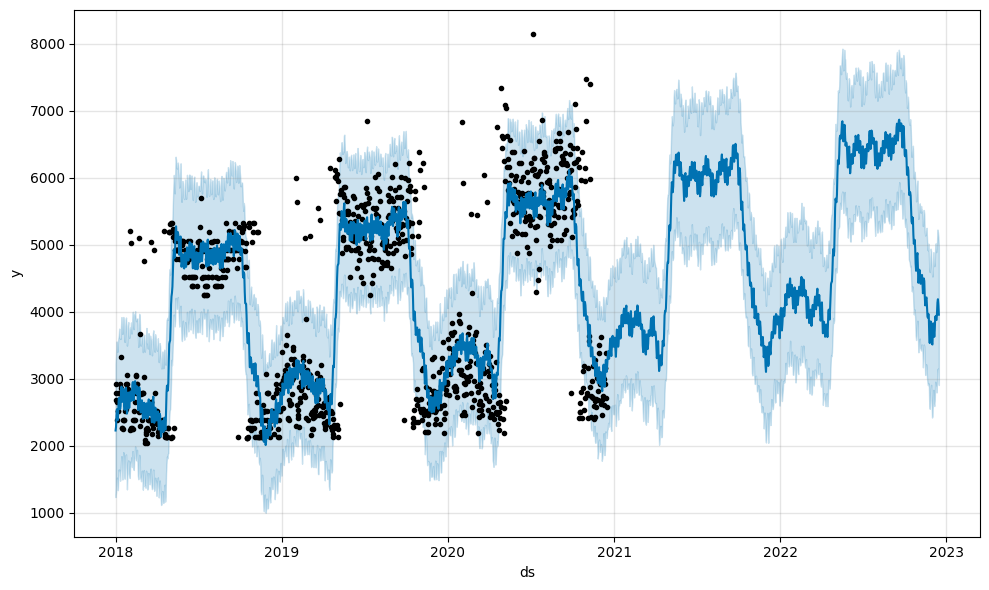

In [ ]:
plot1 = m.plot(forecast)

- The black datapoints are the real observation
- The line is the predicted y-hat

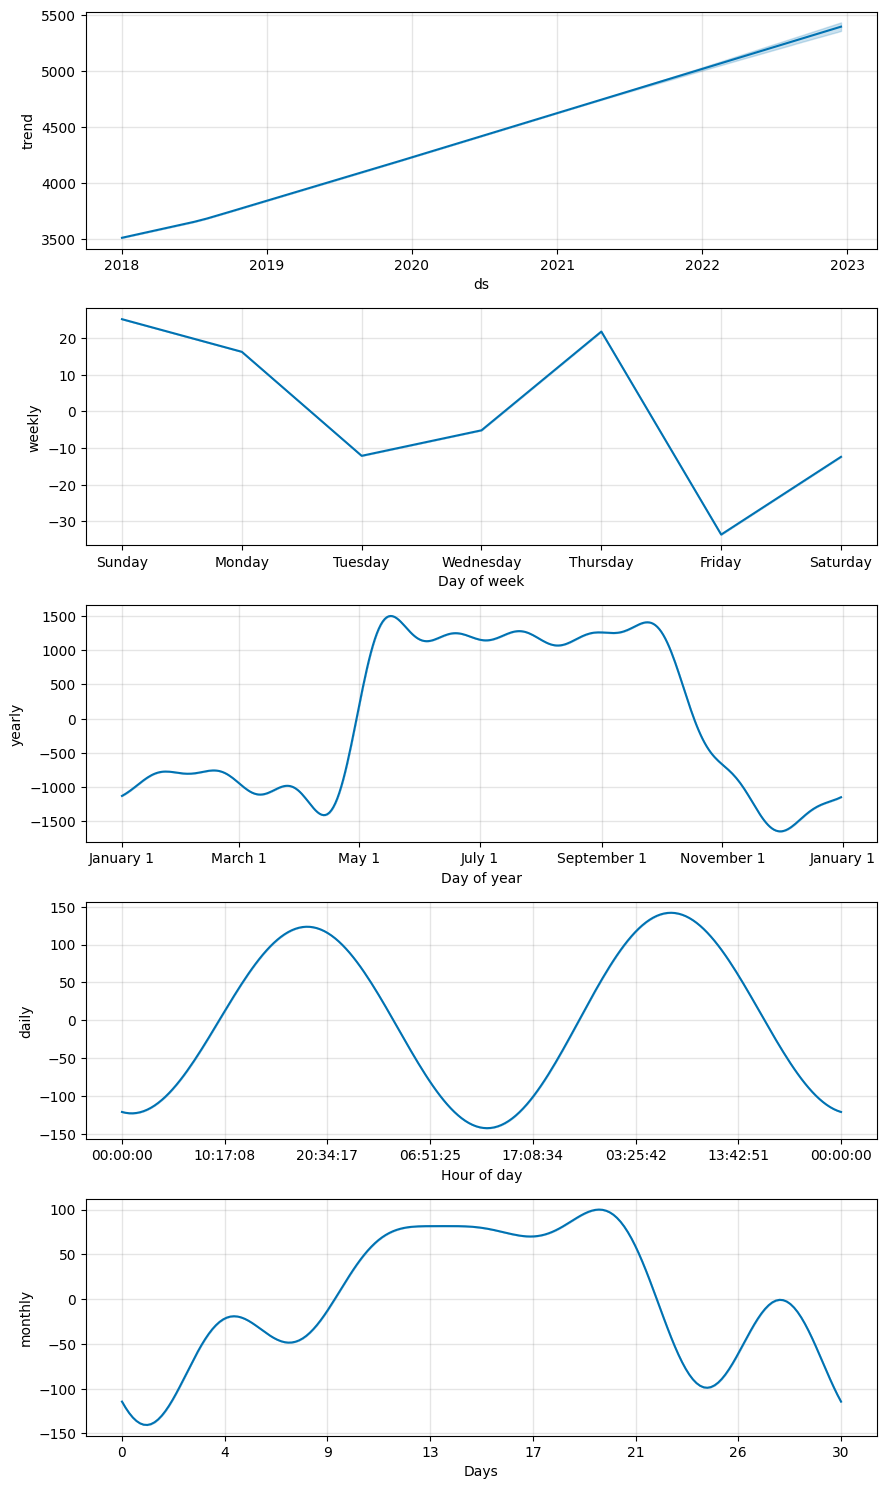

In [ ]:
# Decompose your data
plot2 = m.plot_components(forecast)

## Time Series Forecasting as Supervised Learning

Review:
* What is Supervised Learning?
    
* How is data given in SL?

Supervised learning is where you have input variables (X) and an output variable (y) and you use an algorithm to learn the mapping function from the input to the output.

$Y = f(X)$

We can Shift our time series data to create a Y label

Lets see this in an example for predicting the Future Price of Any Stock with an LSTM!

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Download data from here! https://ca.finance.yahoo.com/

In [ ]:
df = pd.read_csv("/content/BTC-CAD.csv")

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/25/2024,"95,047.4","97,948.8","98,872.4","94,686.1",103.23K,-2.95%
1,11/24/2024,"97,935.2","97,696.4","98,552.6","95,765.4",77.04K,0.24%
2,11/23/2024,"97,699.0","98,927.2","98,927.2","97,180.9",72.17K,-1.24%
3,11/22/2024,"98,929.7","98,381.2","99,617.4","97,182.2",132.23K,0.56%
4,11/21/2024,"98,374.5","94,308.7","98,937.2","94,063.8",179.07K,4.32%


In [ ]:
df.shape

(365, 7)

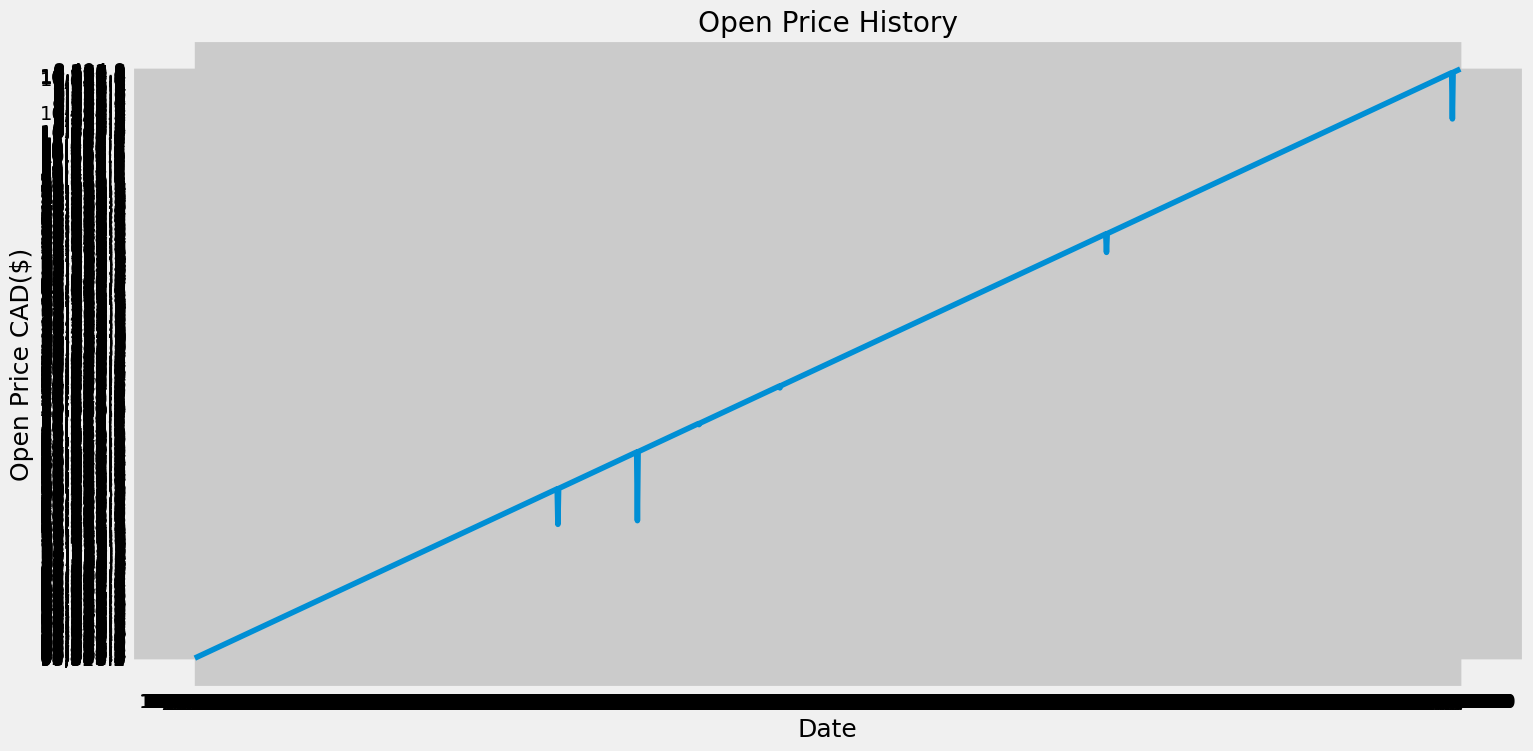

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot( df['Date'], df['Open'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open Price CAD($)',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.26976566],
       [0.24307804],
       [0.24930401],
       [0.2727917 ],
       [0.22545382],
       [0.2321978 ],
       [0.20044499],
       [0.18810205],
       [0.24577888],
       [0.24915359],
       [0.22470874],
       [0.21468679],
       [0.25589065],
       [0.2492404 ],
       [0.26182319],
       [0.27619807],
       [0.28161603],
       [0.2733586 ],
       [0.25042525],
       [0.27487897],
       [0.31133134],
       [0.30840321],
       [0.3089253 ],
       [0.28011562],
       [0.27119075],
       [0.27304217],
       [0.25607283],
       [0.2517727 ],
       [0.26158324],
       [0.27187992],
       [0.26960754],
       [0.26143496],
       [0.27269018],
       [0.27852754],
       [0.2649602 ],
       [0.25605822],
       [0.25050777],
       [0.24593846],
       [0.24836963],
       [0.27309702],
       [0.26290643],
       [0.30612743],
       [0.34485637],
       [0.31352764],
       [0.33873151],
       [0.3538734 ],
       [0.34184504],
       [0.332

In [ ]:
data

,Close
0,26637.658203
1,26102.625000
2,26227.443359
3,26698.324219
4,25749.294922
...,...
360,35385.828125
361,35372.203125
362,35206.792969
363,34171.339844


In [ ]:
#Create training data set
#This is where we shift the data
train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

numDays = 14

for i in range(numDays,len(train_data) -1):
  x_train.append(train_data[i-numDays:i, 0])
  y_train.append(train_data[i + 1,0])

In [ ]:
# train_data[0:7, 0]

In [ ]:
# len(x_train)
x_train

[array([0.26976566, 0.24307804, 0.24930401, 0.2727917 , 0.22545382,
        0.2321978 , 0.20044499, 0.18810205, 0.24577888, 0.24915359,
        0.22470874, 0.21468679, 0.25589065, 0.2492404 ]),
 array([0.24307804, 0.24930401, 0.2727917 , 0.22545382, 0.2321978 ,
        0.20044499, 0.18810205, 0.24577888, 0.24915359, 0.22470874,
        0.21468679, 0.25589065, 0.2492404 , 0.26182319]),
 array([0.24930401, 0.2727917 , 0.22545382, 0.2321978 , 0.20044499,
        0.18810205, 0.24577888, 0.24915359, 0.22470874, 0.21468679,
        0.25589065, 0.2492404 , 0.26182319, 0.27619807]),
 array([0.2727917 , 0.22545382, 0.2321978 , 0.20044499, 0.18810205,
        0.24577888, 0.24915359, 0.22470874, 0.21468679, 0.25589065,
        0.2492404 , 0.26182319, 0.27619807, 0.28161603]),
 array([0.22545382, 0.2321978 , 0.20044499, 0.18810205, 0.24577888,
        0.24915359, 0.22470874, 0.21468679, 0.25589065, 0.2492404 ,
        0.26182319, 0.27619807, 0.28161603, 0.2733586 ]),
 array([0.2321978 , 0.20044499

In [ ]:
len(y_train)

277

In [ ]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
y_train.shape

(277,)

In [ ]:
# x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
# x_train.shape

In [ ]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=7,epochs=4)

Epoch 1/4
40/40 [==============================] - 6s 15ms/step - loss: 0.0630
Epoch 2/4
40/40 [==============================] - 1s 15ms/step - loss: 0.0179
Epoch 3/4
40/40 [==============================] - 1s 15ms/step - loss: 0.0123
Epoch 4/4
40/40 [==============================] - 1s 15ms/step - loss: 0.0129


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - numDays:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(numDays,len(test_data)):
  x_test.append(test_data[i-numDays:i,0])

#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


3/3 [==============================] - 1s 7ms/step


<ipython-input-101-f93ced420f5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


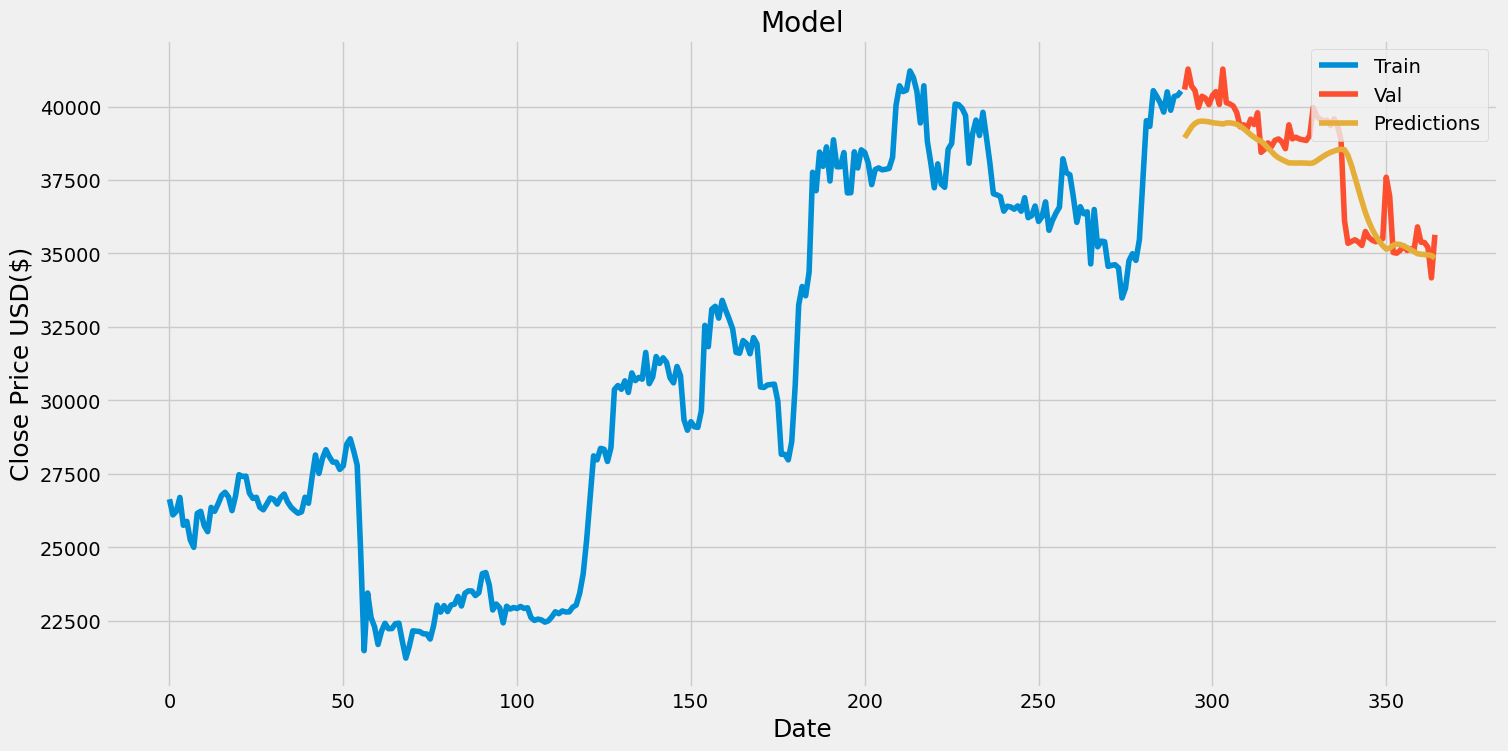

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='upper right')
plt.show()